# CS-591 Machine Learning and Soft Computing 

## Bank Marketing Campaign Predictor 

### Taif AL Beedh - SIU856519747

### Wasimuddin Salar Fathimullah - SIU856530878

This project have 3 sections:
1. Predicting the outcome of the marketing campaign.
2. Predicting the loan eligibility.
3. The differential privacy code ( add noise to both datasets to predict the bank outcome and loan eligibility)

In [1]:
#import the necessary libraries and packages
from __future__ import print_function
from pandas import read_csv
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pylab as pl
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Section 1

# Predicting the outcome of the marketing campaign

For the 1st section the following steps are required:

1.  Loading the dataset
2.  Visualizing the data
3.  Cleaning the data
4.  Building classifiers
5.  Evaluation
6.  Choosing the accurate classifier
7.  Loading the queries file
8.  Predicting the outcome of the predictions file 
9.  Updating the CSV test file to include a predictions column
10. Creating a text file that includes the customer's id and the predicted results

In [2]:

#define the Categorical features, to convert them to numeric values.
CategoricalHeaders = ['job', 'marital', 'education', 'default',  'housing', 'loan', 'contact',  'month',  'poutcome']


In [3]:
#read the dataset and remove the id column 
#https://www.kaggle.com/datasets/edith2021/bank-marketing-campaign

#the path of the dataset folder and the name of the dataset were added in order to be joined together
#adding the path and the dataset name and join the 2 string together
dataset = os.sep.join(['data'] + ['bank.csv'])

#read the dataset using read_csv() and passing filepath (data/bank.csv)
data = pd.read_csv(dataset)

#display the dataset
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
#rename the y column to target
data = data.rename(columns={"y": "target"})
#display the first 5 rows
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
#print both the number of rows and columns using shape function
print(data.shape)

#print the number of columns in the dataframe using shape[1] function
print(data.shape[1])

#print the number of rows in the dataset using shape[0], to getthe number of columns shape[1] can be used
print(data.shape[0])

(45211, 17)
17
45211


In [6]:
#get the size of the dataset, size = an int representing the number of elements in this object
data.size

768587

In [7]:
#get the shape of the dataset, shape = a tuple representing the dimensionality of the DataFrame
data.shape

(45211, 17)

In [8]:
#get the data type of each column
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
target       object
dtype: object

In [9]:
#check for data type, missing values and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
#check for null values
data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
target       False
dtype: bool

In [11]:
#get the number of missing values in each column
print ("total null values: ", data.isna().sum())

total null values:  age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64


In [12]:
#check for missing values, no missing values were founded
data.count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
target       45211
dtype: int64

In [13]:
#create a descriptive statistics, including those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


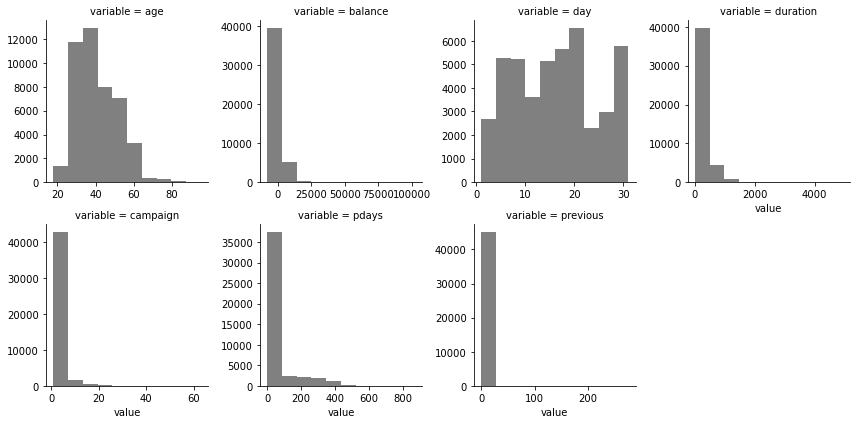

In [14]:
#plot the histograms for the numerical features, using Matplotlib and Seaborn libraries

#for all the columns execpt the object columns (where the columns type is not an object)
quan = list(data.loc[:, data.dtypes != 'object'].columns.values)
#a multi-plot grid that is used to plot conditional relationships
grid = sns.FacetGrid(pd.melt(data, value_vars=quan), col='variable', col_wrap=4, height=3, aspect=1, sharex=False, sharey=False)
#use map to apply a plotting function to each facet’s subset of the data
grid.map(plt.hist, 'value', color="grey")
#display all figures
plt.show()


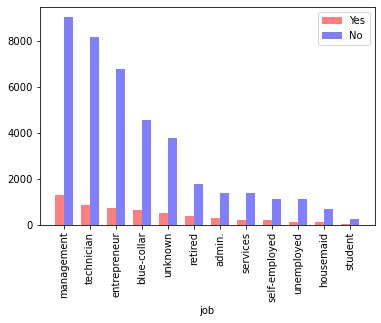

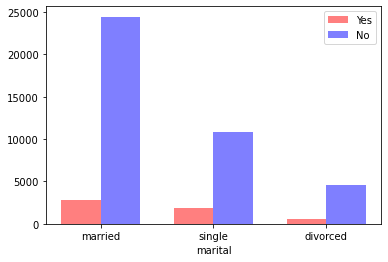

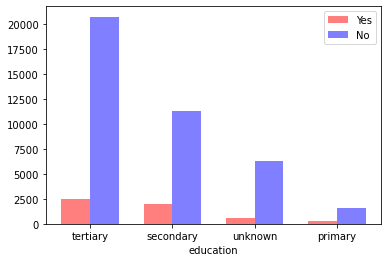

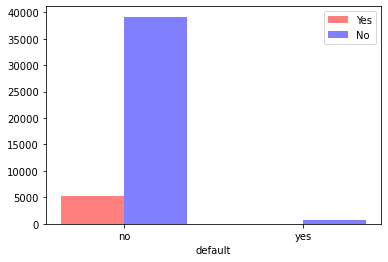

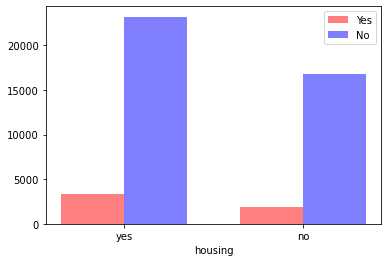

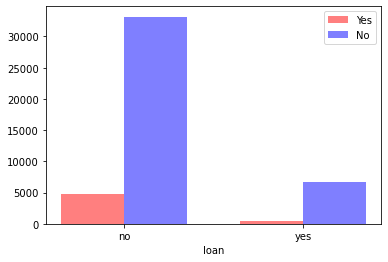

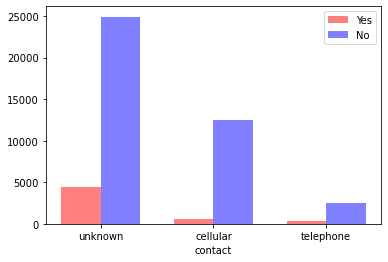

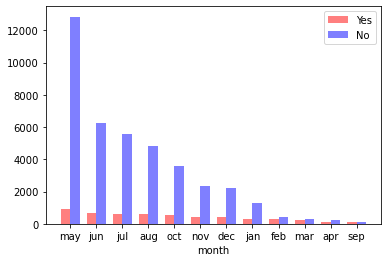

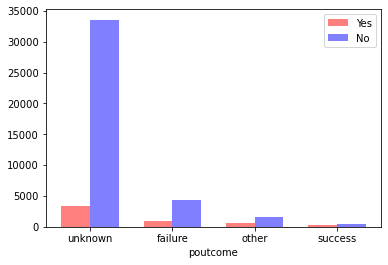

In [15]:
#plotting the categorical features before converting them to numeric values
#store values into targetYes when the taget value is yes
targetYes = data[data['target'] == 'yes']
#store values into targetNo when the taget value is no
targetNo = data[data['target'] == 'no']
#loop around the categorical headers
for header in CategoricalHeaders:
    #teturn evenly spaced values within a given interval (the length of the unique values based on a hash table for the targetNo value in each header)
    x = np.arange(len(targetNo[header].unique()))
    bar_width = 0.35
    #y = a series containing counts of unique values of the targetYes value in each header
    y = targetYes[header].value_counts(sort=True, ascending=False)
    #y1 = a series containing counts of unique values of the targetNo value in each header
    y1 = targetNo[header].value_counts(sort=True, ascending=False)
    #create a bar plot
    plt.bar(x, y, bar_width, align="center", color="red", label="Yes", alpha=0.5)
    #create a bar plot
    plt.bar(x+bar_width, y1, bar_width, color="blue", align="center", label="No", alpha=0.5)
    #if the header is job make the plot current tick locations rotate 90 degrees to fit all the data
    if header == 'job':
        plt.xticks(x+bar_width/2, targetNo[header].unique(), rotation = 90)
    #else keep the plot current tick locations the same without rotating
    else:
        plt.xticks(x+bar_width/2, targetNo[header].unique())
    #set the label for the x-axis to the header name
    plt.xlabel(header)
    #place the legend on the Axes
    plt.legend()
    #display all figures
    plt.show()

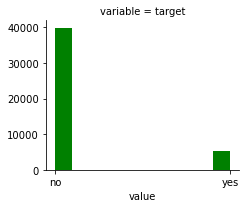

In [16]:
#plot the histograms for the target feature
#a multi-plot grid that is used to plot conditional relationships
grid = sns.FacetGrid(pd.melt(data, value_vars='target'), col='variable', col_wrap=4, height=3, aspect=1, sharex=False, sharey=False)
#use map to apply a plotting function to each facet’s subset of the data
grid.map(plt.hist, 'value', color="green")
#display all figures
plt.show()

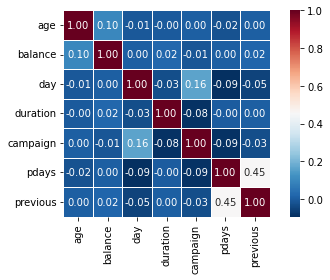

In [17]:
#basic linear correlations
sns.heatmap(data._get_numeric_data().astype(float).corr(), square=True, cmap='RdBu_r', linewidths=.5, annot=True, fmt='.2f').figure.tight_layout()
#display all figures
plt.show()

In [18]:
#check for the poutcome outliers
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [19]:
#check for the balance outliers
data['balance'].value_counts()

 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64

In [20]:
#check for the pdays outliers
data['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [21]:
#check for the job outliers
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [22]:
#check for the education outliers
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [23]:
#check for the default outliers
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [24]:
#check for the age outliers
data['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [25]:
#check for the contact outliers
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [26]:
#check for the campaign outliers
data['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

In [27]:
#check for the previous outliers
data['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

In [28]:
#check for the duration outliers
data['duration'].value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration, Length: 1573, dtype: int64

In [29]:
#check for the previous outliers
data['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

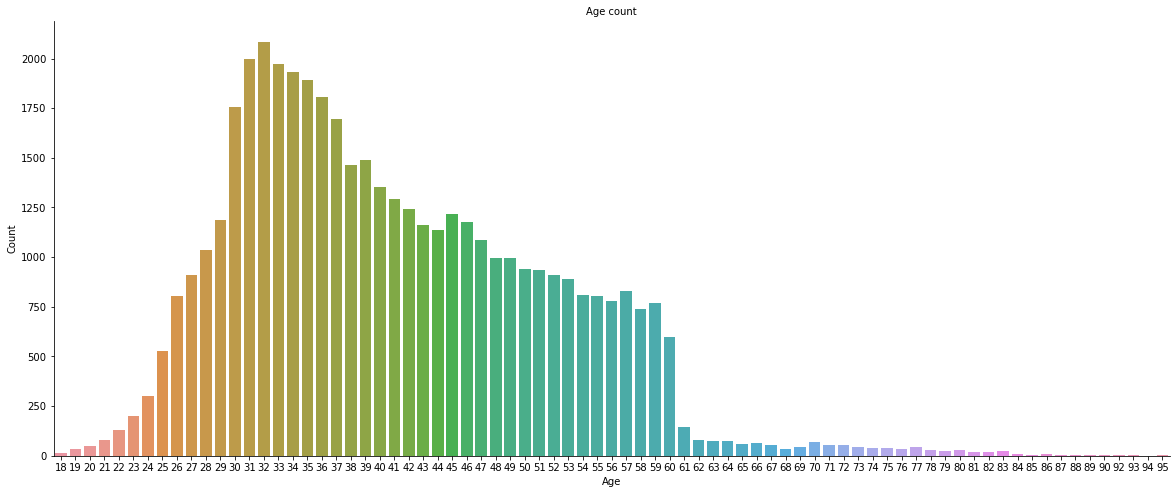

In [30]:
#plotting in details
#use subplots to create a figure and a set of subplots
fig, ax = plt.subplots()
#set the figure size, width = 20 inches and height = 8 inches
fig.set_size_inches(20, 8)
#the counts of observations in each categorical bin using bars
sns.countplot(x = 'age', data = data)
#set the x label to Age and font size to 10
ax.set_xlabel('Age', fontsize=10)
#set the y label to Count and font size to 10
ax.set_ylabel('Count', fontsize=10)
#set the title to Age Count and font size to 10
ax.set_title('Age count', fontsize=10)
#get rid of the top and right spines from plot
sns.despine()

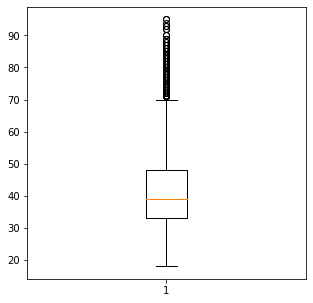

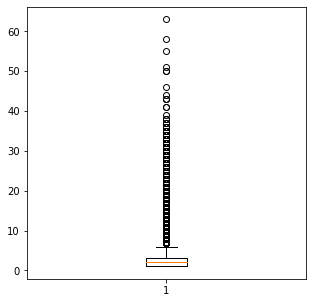

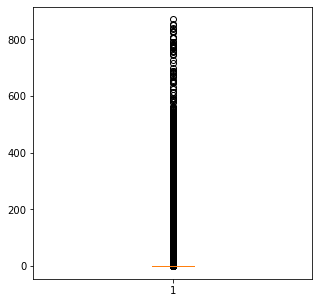

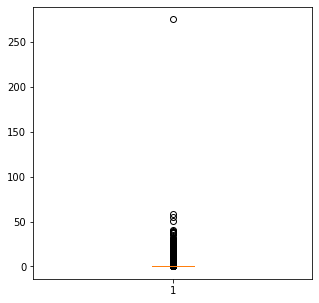

In [31]:
#Displayinig the age Outliers using a box plot 
BoxPlotHheaders = [ 'age', 'campaign', 'pdays', 'previous']
#loop 4 times
for i in range(4):
    #create a new figure, width and height = 5 inches
    fig = plt.figure(figsize =(5, 5)) 
    #creating a box plot for the values of each BoxPlotHheaders column
    plt.boxplot(data[BoxPlotHheaders[i]]) 
    #plt.xticks( [i], [BoxPlotHheaders[i]])
    # show plot, display all figures 
    plt.show() 

In [32]:
#replace unknown to other in both the job and education columns
data[['job', 'education']] = data[['job', 'education']].replace(['unknown'], 'others')


In [33]:
#number of -1 in the pdays coloumn 
count = (data.pdays == -1)
print(count.count())

45211


In [34]:
#Removing any -1 in the pdays coloumn 
data = data[data.pdays != -1]

In [35]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [36]:
#the correlations of each feature
data.corr(method='pearson').iloc[0].sort_values(ascending=False)

age         1.000000
balance     0.115480
duration    0.060519
day         0.018399
campaign    0.003842
previous    0.002280
pdays      -0.107863
Name: age, dtype: float64

In [37]:
#remove outliers

# z_scores = stats.zscore(data)

# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# data = data[filtered_entries]

#remove outliers from numerical features
data[(np.abs(stats.zscore(data.select_dtypes(exclude=['object']))) < 3).all(axis=1)]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes


In [38]:
#copy the bank's data after cleaning it so it can be used later to predict the loan
data_copy = data.copy()


In [39]:
#convert categorical features to numeric, using Label Encoder or dummies

# Label Encoder changes Categorical features to integers. The categorical features are ordinal and the number of categories is large 
#for example [single, single, married, divorced] = [0, 0, 1, 2]

# Dummies expands the dimensions. The categorical features are not ordinal and the number of categories is less 
#for example [single, single, married, divorced] = [1, 1, 0, 0]
#df = pd.get_dummies(df, columns=CategoricalHeaders, drop_first=True)
#df[CategoricalHeaders].replace('?','NA')

#LabelEncoder is used to convert all the categorical features to numeric:
lable = LabelEncoder()
data[CategoricalHeaders] = data[CategoricalHeaders].apply(lambda col: lable.fit_transform(col))



In [40]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
24060,33,0,1,3,0,882,0,0,1,21,10,39,1,151,3,0,no
24062,42,0,2,2,0,-247,1,1,1,21,10,519,1,166,1,1,yes
24064,33,8,1,2,0,3444,1,0,1,21,10,144,1,91,4,0,yes
24072,36,4,1,3,0,2415,1,0,1,22,10,73,1,86,4,1,no
24077,36,4,1,3,0,0,1,0,1,23,10,140,1,143,3,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,1,2,2,0,1475,1,0,0,16,9,1166,3,530,12,1,no
45201,53,4,1,3,0,583,0,0,0,17,9,226,1,184,4,2,yes
45204,73,6,1,2,0,2850,0,0,0,17,9,300,1,40,8,0,yes
45208,72,6,1,2,0,5715,0,0,0,17,9,1127,5,184,3,2,yes


In [41]:
#copy the bank's data after cleaning it so it can be used later before and after adding noise
bank_data = data.copy()

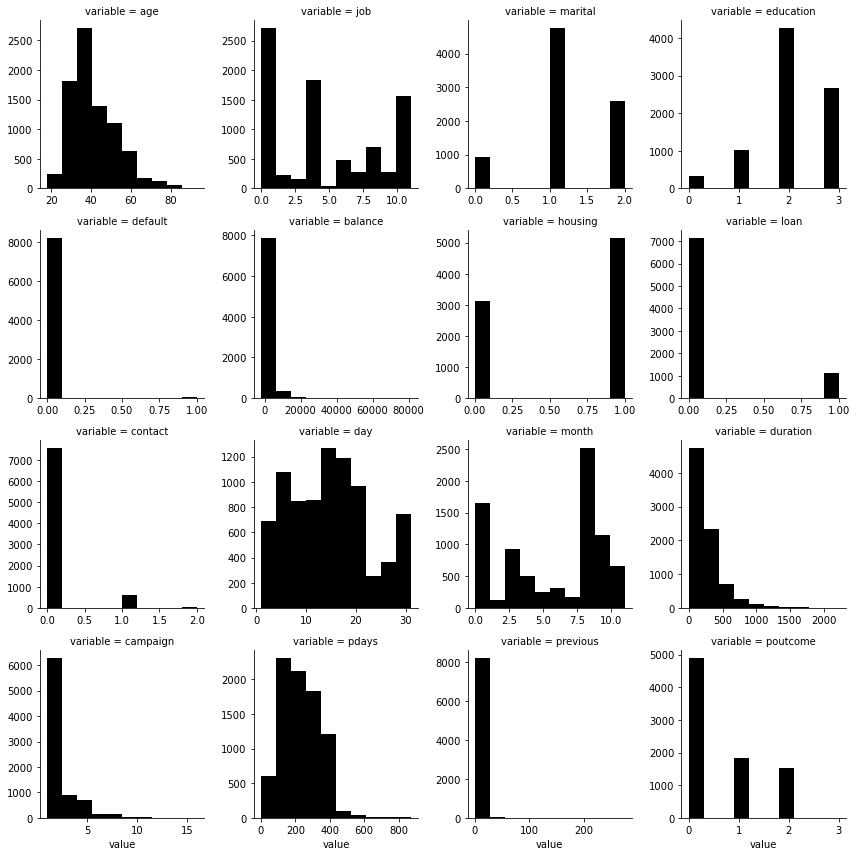

In [42]:
#plot the histograms of the numerical features, using Matplotlib and Seaborn libraries
#After converting the categorical features to numeric
#for all the columns execpt the object columns (where the columns type is not an object)
quan = list(data.loc[:, data.dtypes != 'object'].columns.values)
#a multi-plot grid that is used to plot conditional relationships
grid = sns.FacetGrid(pd.melt(data, value_vars=quan), col='variable', col_wrap=4, height=3, aspect=1, sharex=False, sharey=False)
#use map to apply a plotting function to each facet’s subset of the data
grid.map(plt.hist, 'value', color="black")
#display all figures
plt.show()

In [43]:
#get the data type of each column
data.dtypes

age           int64
job           int64
marital       int64
education     int64
default       int64
balance       int64
housing       int64
loan          int64
contact       int64
day           int64
month         int64
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int64
target       object
dtype: object

In [44]:
# Split the data: 80% training : 20% test set
#create a copy of the dataset data
train_dfs = data.copy()
#remove the target column from the copied dataset
train_dfs = train_dfs.drop(columns=['target'])
#store the target column in targetLabels
targetLabels = data['target']
#split the data into x tarning and testing and y testing and traning, traing set = 80% and testing set = 20% 
instances_train, instances_test, target_train, target_test = train_test_split(train_dfs, targetLabels, test_size=0.2, random_state=0, shuffle=True)


In [45]:
#KFold = K-Folds cross-validator and n_splits = number of folds
fold = KFold(n_splits=10)

### Decision Tree

In [46]:
#To know the value of the max_depth in the Decision Tree Classifier 
#How to decide depth of decision tree:
#The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

DepthRange = list(range(1, 5))
#create an empty series called depthAccuracy
depthAccuracy = []
#loop around the DepthRange
for depth in DepthRange:
    #create a Decision Tree Classifier model based on the depth (maximum depth of the tree)
    classificationTree = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    #fit the instances_train and target_train into the Decision Tree Classifier model using fit()
    classificationTree.fit(instances_train, target_train)
    #get the score of each model by passing both instances_test and target_test for the Decision Tree classifier model to score()
    final = classificationTree.score(instances_test, target_test)
    #append the results of each classifier model into depthAccuracy
    depthAccuracy.append(final)
print(depthAccuracy)


[0.826271186440678, 0.8365617433414043, 0.8353510895883777, 0.8407990314769975]


In [47]:
#Decision Tree Classifier 
#Getting the maximum depth from the previous step = 8
#create a Decision Tree Classifier model with a max_depth (maximum depth of the tree) = 8
decTreeModel = DecisionTreeClassifier(max_depth=8)
#fit the instances_train and target_train into the Decision Tree Classifier model using fit()
decTreeModel.fit(instances_train, target_train)
#Decision Tree Classifier accuracy using traning set
print('Decision Tree Classifier accuracy on training set= {:.2f}'.format(decTreeModel.score(instances_train, target_train)))
#Decision Tree Classifier accuracy using testing set
print('Decision Tree Classifier accuracy on testing set= {:.2f}'.format(decTreeModel.score(instances_test, target_test)))
print('\n')
#run a 10 fold cross validation on this model using the full census data
scores1 = cross_val_score(decTreeModel, instances_train, target_train, cv=fold)
#print('Cross validation mean using the Decision Tree Classifier on training set= ', np.mean(scores1))

scores2 = cross_val_score(decTreeModel, instances_test, target_test, cv=fold)
#print('Cross validation mean using the Decision Tree Classifier on testing set= ', np.mean(scores2))

#cross validation on Decision Tree Classifier using training set
print('Cross validation using the Decision Tree Classifier on training set= ', scores1)
#cross validation on Decision Tree Classifier using testing set
print('Cross validation using the Decision Tree Classifier on testing set= ', scores2)

Decision Tree Classifier accuracy on training set= 0.89
Decision Tree Classifier accuracy on testing set= 0.83


Cross validation using the Decision Tree Classifier on training set=  [0.82450832 0.85476551 0.8214826  0.81996974 0.83812405 0.84848485
 0.82424242 0.82575758 0.83939394 0.81818182]
Cross validation using the Decision Tree Classifier on testing set=  [0.78313253 0.77108434 0.77575758 0.78181818 0.83030303 0.82424242
 0.81212121 0.84242424 0.78181818 0.75151515]


In [48]:
#another way of predicting the accuracy

#predict the target values of the training data by passing instances_train to the Decision Tree Classifier model
predictions1 = decTreeModel.predict(instances_train)
#predict the target values of the testing data by passing instances_test to the Decision Tree Classifier model
predictions2 = decTreeModel.predict(instances_test)
#accuracy score for the training set
print("training set accuracy= " + str(accuracy_score(target_train, predictions1, normalize=True)))
#accuracy score for the tetsing set
print("testing set accuracy= " + str(accuracy_score(target_test, predictions2, normalize=True)))


training set accuracy= 0.8922028766086298
testing set accuracy= 0.8323244552058111


[[1144  111]
 [ 166  231]]


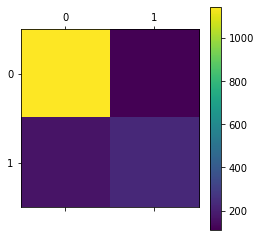

In [49]:
# Confusion Matrix: to evaluate the accuracy of the Decision Tree Classifier 

#predict the target values of the testing data by passing instances_test to the Decision Tree Classifier model
predictions = decTreeModel.predict(instances_test)

#confusion_matrix() is used to calculate the confusion matrix to evaluate the accuracy of a classification
print(confusion_matrix(target_test, predictions))

#plot a Confusion Matrix
ConfusionMatrix = confusion_matrix(target_test, predictions)
#pass the ConfusionMatrix to matshow to show an array as a matrix in a new figure window
pl.matshow(ConfusionMatrix)
#add  a colorbar to a plot
pl.colorbar()
#display the Confusion Matrix
pl.show()

In [50]:
#Building a text report showing the main Decision Tree Classifier metrics
#use classification_report() to display a text report showing the main classification metrics, both target_test and predictions are passed to the classification_report() function
print(classification_report(target_test, predictions))


              precision    recall  f1-score   support

          no       0.87      0.91      0.89      1255
         yes       0.68      0.58      0.63       397

    accuracy                           0.83      1652
   macro avg       0.77      0.75      0.76      1652
weighted avg       0.83      0.83      0.83      1652



### K-Nearest Neighbors (KNN)

In [51]:
#K-Nearest Neighbors Algorithm accuracy + cross validation
#create a K-Nearest Neighbors Classifier, set the number of neighbors to use to 3
neigh = KNeighborsClassifier(n_neighbors=3)

#fit the instances_train and target_train into the K-Nearest Neighbors Classifier model using fit()
neigh.fit(instances_train, target_train)

#cross validation on KNN Classifier using training set
print('K-Nearest Neighbors Algorithm accuracy on training set= {:.2f}'.format(neigh.score(instances_train, target_train)))
#cross validation on KNN Classifier using testing set
print('K-Nearest Neighbors Algorithm accuracy on testing set= {:.2f}'.format(neigh.score(instances_test, target_test)))

K-Nearest Neighbors Algorithm accuracy on training set= 0.87
K-Nearest Neighbors Algorithm accuracy on testing set= 0.77


In [52]:
#run a 10 fold cross validation on this model using the full census data

#the cross validation mean vales of the K-Nearest Neighbors Algorithm on training set
print('Cross validation mean using the K-Nearest Neighbors Algorithm on training set= ', np.mean(scores1))
#the cross validation mean vales of the K-Nearest Neighbors Algorithm on testing set
print('Cross validation using the K-Nearest Neighbors Algorithm on testing set= ', np.mean(scores2))
print('\n')

#evaluate a score by cross-validation using the training set
scores1 = cross_val_score(neigh, instances_train, target_train, cv=fold)
#cross validation on KNN Classifier using training set
print('Cross validation using the K-Nearest Neighbors Algorithm on training set= ', scores1)

#evaluate a score by cross-validation using the testing set
scores2 = cross_val_score(neigh, instances_test, target_test, cv=fold)
#cross validation on KNN Classifier using testing set
print('Cross validation using the K-Nearest Neighbors Algorithm on testing set= ', scores2)

Cross validation mean using the K-Nearest Neighbors Algorithm on training set=  0.8314910832989503
Cross validation using the K-Nearest Neighbors Algorithm on testing set=  0.795421686746988


Cross validation using the K-Nearest Neighbors Algorithm on training set=  [0.76853253 0.79425113 0.7730711  0.76853253 0.77458396 0.76969697
 0.7530303  0.75757576 0.76060606 0.77575758]
Cross validation using the K-Nearest Neighbors Algorithm on testing set=  [0.78915663 0.70481928 0.72727273 0.73939394 0.84848485 0.78787879
 0.74545455 0.76969697 0.73333333 0.70909091]


[[1110  145]
 [ 229  168]]


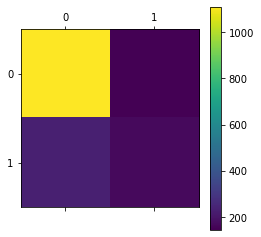

In [53]:
# Confusion Matrix: to evaluate the accuracy of the K-Nearest Neighbors Classifier 

#predict the target values of the testing data by passing instances_test to the KNN Classifier model
predictions = neigh.predict(instances_test)

#confusion_matrix() is used to calculate the confusion matrix to evaluate the accuracy of a classification
print(confusion_matrix(target_test, predictions))


#plot a Confusion Matrix
ConfusionMatrix = confusion_matrix(target_test, predictions)
#pass the ConfusionMatrix to matshow to show an array as a matrix in a new figure window
pl.matshow(ConfusionMatrix)
#add  a colorbar to a plot
pl.colorbar()
#display the Confusion Matrix
pl.show()

In [54]:
#Building a text report showing the main K-Nearest Neighbors Classifier metrics
#use classification_report() to display a text report showing the main classification metrics, both target_test and predictions are passed to the classification_report() function
print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

          no       0.83      0.88      0.86      1255
         yes       0.54      0.42      0.47       397

    accuracy                           0.77      1652
   macro avg       0.68      0.65      0.66      1652
weighted avg       0.76      0.77      0.76      1652



### Naive Bayes

In [55]:
#Naive Bayes

#create a Naive Bayes Classifier model
gnb = GaussianNB()
#fit the instances_train and target_train into the Naive Bayes Classifier model using fit()
gnb.fit(instances_train, target_train)

#cross validation on Naive Bayes Classifier using training set
print('Naive Bayes accuracy on training set= {:.2f}'.format(gnb.score(instances_train, target_train)))
#cross validation on Naive Bayes Classifier using testing set
print('Naive Bayes accuracy on testing set= {:.2f}'.format(gnb.score(instances_test, target_test)))

#run a 10 fold cross validation on this model using the full census data
scores1 = cross_val_score(gnb, instances_train, target_train, cv=fold)
#cross validation on Naive Bayes Classifier using training set
print('Cross validation mean using the Naive Bayess Algorithm on training set= ', np.mean(scores1))

scores2 = cross_val_score(gnb, instances_test, target_test, cv=fold)
#cross validation on Naive Bayes Classifier using testing set
print('Cross validation using the Naive Bayes Algorithm on testing set= ', np.mean(scores2))


Naive Bayes accuracy on training set= 0.81
Naive Bayes accuracy on testing set= 0.80
Cross validation mean using the Naive Bayess Algorithm on training set=  0.8045410993444275
Cross validation using the Naive Bayes Algorithm on testing set=  0.7935377875136911


In [56]:
#another way of predicting the accuracy
#predict the target values of the training data by passing instances_train to the Naive Bayes Classifier model
predictions1 = gnb.predict(instances_train)
#predict the target values of the testing data by passing instances_test to the Naive Bayes Classifier model
predictions2 = gnb.predict(instances_test)
#accuracy score for the training set
print("training set accuracy= " + str(accuracy_score(target_train, predictions1, normalize=True)))
#accuracy score for the testing set
print("testing set accuracy= " + str(accuracy_score(target_test, predictions2, normalize=True)))


training set accuracy= 0.8056018168054504
testing set accuracy= 0.7966101694915254


[[1067  188]
 [ 148  249]]


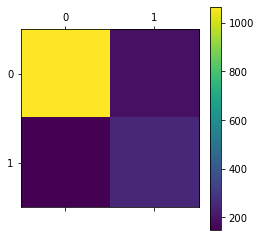

In [57]:
#This step is not necessary as Naive Bayes had the lowest results!
# Confusion Matrix: to evaluate the accuracy of the Naive Bayes Classifier 

#predict the target values of the testing data by passing instances_test to the Naive Bayes Classifier model
predictions = gnb.predict(instances_test)

#confusion_matrix() is used to calculate the confusion matrix to evaluate the accuracy of a classification
print(confusion_matrix(target_test, predictions))

#plot a Confusion Matrix
ConfusionMatrix = confusion_matrix(target_test, predictions)
#pass the ConfusionMatrix to matshow to show an array as a matrix in a new figure window
pl.matshow(ConfusionMatrix)
#add  a colorbar to a plot
pl.colorbar()
#display the Confusion Matrix
pl.show()

In [58]:
#Building a text report showing the main Naive Bayes Classifier metrics
#use classification_report() to display a text report showing the main classification metrics, both target_test and predictions are passed to the classification_report() function
print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

          no       0.88      0.85      0.86      1255
         yes       0.57      0.63      0.60       397

    accuracy                           0.80      1652
   macro avg       0.72      0.74      0.73      1652
weighted avg       0.80      0.80      0.80      1652



In [59]:
#read the queries txt file and remove the target columns

#the path of the dataset folder and the name of the dataset were added in order to be joined together
#adding the path and the dataset name and join the 2 string together
dataset1 = os.sep.join(['data'] + ['queries.csv']) 

#read the dataset using read_csv() and passing filepath (data/queries.csv)
queries = pd.read_csv(dataset1)


In [60]:
#add an id column to the dataset
queries.insert(loc=0, column='id', value=queries.index + 1)
queries

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [61]:
#copy the ids before dropping the column so we can get them back in the final txt file
query_id = queries['id'].copy()
#remove the id column from the dataset
queries = queries.drop(columns=['id'])
#display the first 5 rows
queries.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [62]:
#get the data type of each column
queries.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [63]:
#convert categorical features to numeric, using Label Encoder 
lable = LabelEncoder()
#LabelEncoder is used to convert all the categorical features to numeric:
queries[CategoricalHeaders]= queries[CategoricalHeaders].apply(lambda col: lable.fit_transform(col))
queries

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [64]:
#get the data type of each column
queries.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
dtype: object

In [65]:
#since the Decision Tree Classifier had the highest accuracy, it will be used to predict the outcome
#predict the target values of the queries by passing queries to the Decision Tree Classifier model
Decision_Tree_Predictions = decTreeModel.predict(queries)


In [66]:
#Decision_Tree_Predictions will have all the target column results
Decision_Tree_Predictions

array(['no', 'no', 'no', ..., 'yes', 'yes', 'no'], dtype=object)

In [67]:
#add the Decision_Tree_Predictions (predictions results) column to the queries dataframe
queries['prediction'] = Decision_Tree_Predictions
queries

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,prediction
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,yes
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,yes
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,yes
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,yes


In [68]:
#creat a new csv queries file with the added prediction column
queries.to_csv("Predictions.csv", encoding='utf-8', index = None)


In [69]:
#create a new file called predictions.txt that contains the id followed by a comma followed by your classifier’s prediction id,prediction
#txt file created for writing
PredictionsFile = open('predictions.txt', 'w')

#loop around the predictions length
for i in range(len(Decision_Tree_Predictions)):
    #write into the txt file the id that was copied before dropping the column follwed by a comma , and then the Decision Tree prediction
    #ensure that the oucome the following format= TEST1,”Type..”
    PredictionsFile.write(str(query_id[i]) + ',' + '\"'+  Decision_Tree_Predictions[i] + '\"')
    #check if i is smaller than the length of the Decision Tree predictions => move to the next line  
    if i < len(Decision_Tree_Predictions) - 1:
        #add a new line
        PredictionsFile.write('\n')

#close the file
PredictionsFile.close()



In [70]:
#display the predictions.txt file

#read the dataset using read_csv() and passing filepath (predictions.txt)
#use header=None to assign the first row of predictions.txt to the first row of pf( columns won't have names)
pf = pd.read_csv('predictions.txt', header=None)
#add 2 columns (Test ID and Prediction) to pd
pf.columns = ['Test ID','Prediction']
pf

,Test ID,Prediction
0,1,no
1,2,no
2,3,no
3,4,no
4,5,yes
...,...,...
45206,45207,yes
45207,45208,yes
45208,45209,yes
45209,45210,yes


# Section 2

# Predicting the loan eligibility

For the 2nd section the following steps are required:

1. Drop unnecessary columns from both the bank dataset and the loan dataset.
2. Replace column values in the bank dataset to match the column values in the loan dataset.
3. Rename the columns in the loan dataset to match the column names in the bank dataset.
4. Merge both datasets using common columns.
5. Clean the merged data by removing empty rows.
6. Use LabelEncoder to convert categorical features to numeric.
7. Predict loan eligibility.

In [71]:
#predict the loan:

#read the dataset and remove the id column 
# https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset?resource=download

#the path of the dataset folder and the name of the dataset were added in order to be joined together
#adding the path and the dataset name and join the 2 string together
dataset = os.sep.join(['data'] + ['loan-train.csv']) 
#read the dataset using read_csv() and passing filepath (data/loan-train.csv)
loan_data = pd.read_csv(dataset)
#display the first 5 rows of loan_data
loan_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [72]:
#get the data type of each column
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [73]:
#number of columns
len(loan_data.columns)

13

In [74]:
#number of rows
len(loan_data)

614

In [75]:
#drop the unused columns in the loan_data dataset: Loan_ID, Gender, Dependents, Self_Employed, CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Property_Area

loan_data = loan_data.drop(columns=['Loan_ID', 'Gender', 'Dependents', 'Self_Employed', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Property_Area'])
loan_data


,Married,Education,ApplicantIncome,Credit_History,Loan_Status
0,No,Graduate,5849,1.0,Y
1,Yes,Graduate,4583,1.0,N
2,Yes,Graduate,3000,1.0,Y
3,Yes,Not Graduate,2583,1.0,Y
4,No,Graduate,6000,1.0,Y
...,...,...,...,...,...
609,No,Graduate,2900,1.0,Y
610,Yes,Graduate,4106,1.0,Y
611,Yes,Graduate,8072,1.0,Y
612,Yes,Graduate,7583,1.0,Y


In [76]:
#drop the unused columns in the data_copy dataset: default, housing, contact, day, month, duration, campaign, pdays, previous, poutcome, and target
data_copy = data_copy.drop(columns=['default', 'housing','contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'target'])
data_copy.columns


Index(['age', 'job', 'marital', 'education', 'balance', 'loan'], dtype='object')

In [77]:

#replace married to yes to match the Married column in the loan dataset
data_copy.loc[data_copy["marital"] == "married", "marital"] = "Yes"
#replace single and divorced to no to match the Married column in the loan dataset
data_copy.loc[(data_copy["marital"] == "single") | (data_copy["marital"] == "divorced"), "marital"] = "No"

#replace tertiary in the education column to graduate to match the education column in the loan dataset
data_copy.loc[data_copy["education"] == "tertiary", "education"] = "Graduate"
#replace all the Not Graduate values in the education column to not graduate to match the education column in the loan dataset
data_copy.loc[data_copy["education"] != "Graduate", "education"] = "Not Graduate"

#replace the loan value in the education column to 1 if the customer haven't had a loan before in order to match the Credit_History column in the loan dataset
data_copy.loc[data_copy["loan"] == "yes", "loan"] = 1
#replace the loan value in the education column to 0 if the customer had have a loan before in order to match the Credit_History column in the loan dataset
data_copy.loc[data_copy["loan"] == "no", "loan"] = 0



In [78]:
#count the matching values between data_copy and loan_data for the balance and ApplicantIncome columns
data_copy['balance'].isin(loan_data['ApplicantIncome']).value_counts()

False    8060
True      197
Name: balance, dtype: int64

In [79]:
#count the matching values between data_copy and loan_data for the marital and ApplicantIncome columns
data_copy['marital'].isin(loan_data['Married']).value_counts()

True    8257
Name: marital, dtype: int64

In [80]:
#count the matching values between data_copy and loan_data for the education and Education columns
data_copy['education'].isin(loan_data['Education']).value_counts()

True    8257
Name: education, dtype: int64

In [81]:
data_copy

,age,job,marital,education,balance,loan
24060,33,admin.,Yes,Graduate,882,0
24062,42,admin.,No,Not Graduate,-247,1
24064,33,services,Yes,Not Graduate,3444,0
24072,36,management,Yes,Graduate,2415,0
24077,36,management,Yes,Graduate,0,0
...,...,...,...,...,...,...
45199,34,blue-collar,No,Not Graduate,1475,0
45201,53,management,Yes,Graduate,583,0
45204,73,retired,Yes,Not Graduate,2850,0
45208,72,retired,Yes,Not Graduate,5715,0


In [82]:
#count the matching values between data_copy and loan_data for the loan and Credit_History columns
data_copy['loan'].isin(loan_data['Credit_History']).value_counts()

True    8257
Name: loan, dtype: int64

In [83]:
#rename the columns in the loan dataset to match the column names in the copied dataset
loan_data.columns = ['marital', 'education', 'balance', 'loan', 'Loan_Status']


In [84]:
loan_data

,marital,education,balance,loan,Loan_Status
0,No,Graduate,5849,1.0,Y
1,Yes,Graduate,4583,1.0,N
2,Yes,Graduate,3000,1.0,Y
3,Yes,Not Graduate,2583,1.0,Y
4,No,Graduate,6000,1.0,Y
...,...,...,...,...,...
609,No,Graduate,2900,1.0,Y
610,Yes,Graduate,4106,1.0,Y
611,Yes,Graduate,8072,1.0,Y
612,Yes,Graduate,7583,1.0,Y


In [85]:
# merge and combine the new dataset (loan dataset) to the original dataset (bank dataset) using common columns
# merge the loan_data dataset to the data_copy dataset based on 4 columns marital, education, balance, and loan
df_merged = pd.merge(data_copy, loan_data, on=['marital', 'education', 'balance', 'loan'], how='left')


In [86]:
# check the unique values in the merged dataset
df_merged.Loan_Status.unique()

array([nan, 'Y', 'N'], dtype=object)

In [87]:
# drop rows with any nan values
df_merged = df_merged.dropna(axis=0, how='any')
df_merged

,age,job,marital,education,balance,loan,Loan_Status
179,46,management,Yes,Graduate,4301,1,Y
359,55,blue-collar,No,Not Graduate,4053,0,N
681,55,entrepreneur,Yes,Graduate,3459,1,Y
1566,52,admin.,Yes,Not Graduate,2281,1,N
2383,34,services,Yes,Not Graduate,210,1,Y
2440,33,blue-collar,No,Not Graduate,3975,1,Y
2955,36,management,Yes,Graduate,2957,1,Y
3593,40,admin.,No,Not Graduate,2679,1,Y
3611,49,services,Yes,Not Graduate,4300,1,Y
3713,45,management,No,Graduate,2237,0,N


In [88]:
#get the data type of each column
df_merged.dtypes

age             int64
job            object
marital        object
education      object
balance         int64
loan           object
Loan_Status    object
dtype: object

In [89]:
#use LabelEncoder to convert categorical features to numeric
#all the object column names in order to use them with LabelEncoder
CategoricalHeaders = ['job', 'marital', 'education', 'loan', 'Loan_Status']
lable = LabelEncoder()
#LabelEncoder is used to convert all the categorical features to numeric:
df_merged[CategoricalHeaders] = df_merged[CategoricalHeaders].apply(lambda col: lable.fit_transform(col))


In [90]:
#get the data type of each column
df_merged.dtypes

age            int64
job            int64
marital        int64
education      int64
balance        int64
loan           int64
Loan_Status    int64
dtype: object

In [91]:
# Split the data: 80% training : 20% test set
#create a copy of the dataset df_merged
train_dfs = df_merged.copy()
#remove the target column from the copied dataset
train_dfs = train_dfs.drop(columns=['Loan_Status'])
#store the target column in targetLabels
targetLabels = df_merged['Loan_Status']
#split the data into x tarning and testing and y testing and traning, traing set = 80% and testing set = 20% 
instances_train, instances_test, target_train, target_test = train_test_split(train_dfs, targetLabels, test_size=0.2, random_state=0, shuffle=True)


In [92]:
#Decision Tree Classifier 
#Getting the maximum depth from the previous step = 8
#create a Decision Tree Classifier model with a max_depth (maximum depth of the tree) = 8
decTreeModel = DecisionTreeClassifier(max_depth=8)
#fit the instances_train and target_train into the Decision Tree Classifier model using fit()
decTreeModel.fit(instances_train.values, target_train.values)
#Decision Tree Classifier accuracy using traning set
print('Decision Tree Classifier accuracy on training set= {:.2f}'.format(decTreeModel.score(instances_train.values, target_train)))
#Decision Tree Classifier accuracy using testing set
print('Decision Tree Classifier accuracy on testing set= {:.2f}'.format(decTreeModel.score(instances_test.values, target_test)))


Decision Tree Classifier accuracy on training set= 1.00
Decision Tree Classifier accuracy on testing set= 1.00


In [93]:
#get the data for the 1st row in the df_merged dataset
df_merged.iloc[0].values 

array([  46,    3,    1,    0, 4301,    1,    1])

In [94]:
#predict the loan eligibility for the 1st row
decTreeModel.predict([[46, 3, 1, 0, 4301, 1]]) 
#predicted result is 1 = yes

array([1])

In [95]:
#get the data for the 4th row in the df_merged dataset
df_merged.iloc[3].values 

array([  52,    0,    1,    1, 2281,    1,    0])

In [96]:
#predict the loan eligibility for the 4th row
decTreeModel.predict([[52, 0, 1, 1, 2281, 1]]) 

#predicted result is 0 = no

array([0])

[[2 0]
 [0 2]]


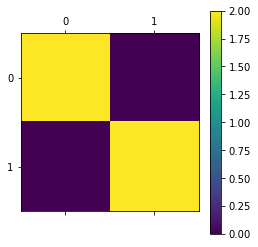

In [97]:
# Confusion Matrix: to evaluate the accuracy of the Decision Tree Classifier 

#predict the target values of the testing data by passing instances_test to the Decision Tree Classifier model
predictions = decTreeModel.predict(instances_test.values)

#confusion_matrix() is used to calculate the confusion matrix to evaluate the accuracy of a classification
print(confusion_matrix(target_test, predictions))

#plot a Confusion Matrix
ConfusionMatrix = confusion_matrix(target_test, predictions)
#pass the ConfusionMatrix to matshow to show an array as a matrix in a new figure window
pl.matshow(ConfusionMatrix)
#add  a colorbar to a plot
pl.colorbar()
#display the Confusion Matrix
pl.show()

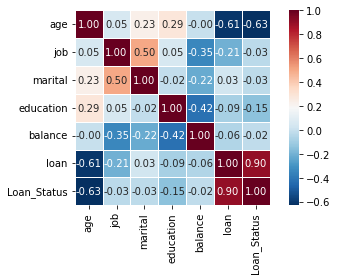

In [98]:
#basic linear correlations
sns.heatmap(df_merged._get_numeric_data().astype(float).corr(), square=True, cmap='RdBu_r', linewidths=.5, annot=True, fmt='.2f').figure.tight_layout()
#display all figures
plt.show()

In [99]:
#creat a new csv file called df_merged 
df_merged.to_csv("loan.csv", encoding='utf-8', index = None)


# Section 3

# Differential Privacy that predicts the marketing campaign outcome and loan eligibility

For the 3rd section the following steps are required:

1. Predict the outcome of both datasets before adding noise.
2. Drop the target column from both bank dataset and loan dataset. 
3. Add noise to both datasets. 
4. Return the target columns to the bank dataset and loan dataset.  
5. Predict the outcome for both the bank dataset and loan dataset.

In [100]:
#read the dataset using read_csv() and passing filepath (loan.csv)
loan_data = pd.read_csv("loan.csv")
#display the first 5 rows
loan_data.head()

,age,job,marital,education,balance,loan,Loan_Status
0,46,3,1,0,4301,1,1
1,55,1,0,1,4053,0,0
2,55,2,1,0,3459,1,1
3,52,0,1,1,2281,1,0
4,34,5,1,1,210,1,1


In [101]:
#print both the number of rows and columns using shape function for the loan_data dataset
loan_data.shape

(19, 7)

In [102]:
#print both the number of rows and columns using shape function for the bank_data dataset
bank_data.shape

(8257, 17)

# Predicting data before adding noise

### Predicting marketing campaign outcome

In [103]:
# Split the data: 80% training : 20% test set

#create a copy of the dataset bank_data
train_dfs = bank_data.copy()
#remove the target column from the copied dataset
train_dfs = train_dfs.drop(columns=['target'])
#store the target column in targetLabels
targetLabels = bank_data['target']
#split the data into x tarning and testing and y testing and traning, traing set = 80% and testing set = 20% 
instances_train, instances_test, target_train, target_test = train_test_split(train_dfs, targetLabels, test_size=0.2, random_state=0, shuffle=True)


In [104]:
#create a Decision Tree Classifier model with a max_depth (maximum depth of the tree) = 8
decTreeModel = DecisionTreeClassifier(max_depth=8)
#fit the instances_train values and target_train values into the Decision Tree Classifier model using fit()
decTreeModel.fit(instances_train.values, target_train.values)
#Decision Tree Classifier accuracy using traning set
print('Decision Tree Classifier accuracy on training set= {:.2f}'.format(decTreeModel.score(instances_train.values, target_train)))
#Decision Tree Classifier accuracy using testing set
print('Decision Tree Classifier accuracy on testing set= {:.2f}'.format(decTreeModel.score(instances_test.values, target_test)))


Decision Tree Classifier accuracy on training set= 0.89
Decision Tree Classifier accuracy on testing set= 0.83


In [105]:
#get the values of the 1st row (before adding noise)
bank_data.iloc[0].values

array([33, 0, 1, 3, 0, 882, 0, 0, 1, 21, 10, 39, 1, 151, 3, 0, 'no'],
      dtype=object)

In [106]:
#predict the outsome using the 1st row data
decTreeModel.predict([[33, 0, 1, 3, 0, 882, 0, 0, 1, 21, 10, 39, 1, 151, 3, 0]]) 


array(['no'], dtype=object)

In [107]:
#get the values of the 4th row (before adding noise)
bank_data.iloc[4].values

array([36, 4, 1, 3, 0, 0, 1, 0, 1, 23, 10, 140, 1, 143, 3, 0, 'yes'],
      dtype=object)

In [108]:
#predict the outsome using the 4th row data
decTreeModel.predict([[36, 4, 1, 3, 0, 0, 1, 0, 1, 23, 10, 140, 1, 143, 3, 0]]) 


array(['yes'], dtype=object)

In [109]:
#copy the target column of the bank_data dataset so it can be dropped from bank_data before adding noise and then returned after adding noise
target_copy = bank_data['target'].copy()
bank_data = bank_data.drop(columns=['target'])
#display the first 5 rows
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24060,33,0,1,3,0,882,0,0,1,21,10,39,1,151,3,0
24062,42,0,2,2,0,-247,1,1,1,21,10,519,1,166,1,1
24064,33,8,1,2,0,3444,1,0,1,21,10,144,1,91,4,0
24072,36,4,1,3,0,2415,1,0,1,22,10,73,1,86,4,1
24077,36,4,1,3,0,0,1,0,1,23,10,140,1,143,3,0


In [110]:
#print both the number of rows and columns using shape function for the bank_data dataset
bank_data.shape

(8257, 16)

### Predicting loan eligibility

In [111]:
# Split the loan_data data: 80% training : 20% test set
#create a copy of the dataset loan_data
train_dfs = loan_data.copy()
#remove the target column from the copied dataset
train_dfs = train_dfs.drop(columns=['Loan_Status'])
#store the target column in targetLabels
targetLabels = loan_data['Loan_Status']
#split the data into x tarning and testing and y testing and traning, traing set = 80% and testing set = 20% 
instances_train, instances_test, target_train, target_test = train_test_split(train_dfs, targetLabels, test_size=0.2, random_state=0, shuffle=True)


In [112]:
#create a Decision Tree Classifier model with a max_depth (maximum depth of the tree) = 8
decTreeModel = DecisionTreeClassifier(max_depth=8)
#fit the instances_train values and target_train values into the Decision Tree Classifier model using fit()
decTreeModel.fit(instances_train.values, target_train.values)
#Decision Tree Classifier accuracy using traning set
print('Decision Tree Classifier accuracy on training set= {:.2f}'.format(decTreeModel.score(instances_train.values, target_train)))
#Decision Tree Classifier accuracy using testing set
print('Decision Tree Classifier accuracy on testing set= {:.2f}'.format(decTreeModel.score(instances_test.values, target_test)))


Decision Tree Classifier accuracy on training set= 1.00
Decision Tree Classifier accuracy on testing set= 1.00


In [113]:
#get the values of the 1st row (before adding noise)
loan_data.iloc[0].values

array([  46,    3,    1,    0, 4301,    1,    1])

In [114]:
#predict the outsome using the 1st row data
decTreeModel.predict([[46, 3, 1, 0, 4301, 1]]) 


array([1])

In [115]:
#get the values of the 2nd row (before adding noise)
loan_data.iloc[1].values 

array([  55,    1,    0,    1, 4053,    0,    0])

In [116]:
#predict the outsome using the 2nd row data
decTreeModel.predict([[55, 1, 0, 1, 4053, 0]]) 


array([0])

In [117]:
#copy the target column of the loan_data dataset so it can be dropped from loan_data before adding noise and then returned after adding noise
Loan_Status_copy = loan_data['Loan_Status'].copy()
#remove the target column from the copied data
loan_data = loan_data.drop(columns=['Loan_Status'])
#display the first 5 rows
loan_data.head()

,age,job,marital,education,balance,loan
0,46,3,1,0,4301,1
1,55,1,0,1,4053,0
2,55,2,1,0,3459,1
3,52,0,1,1,2281,1
4,34,5,1,1,210,1


In [118]:
#print both the number of rows and columns using shape function for the loan_data dataset
loan_data.shape

(19, 6)

# Adding noise to both the bank data and the loan data

In [119]:
#add noise to both loan_data and bank_data datasets using the dataset shape
#laplace is used to draw samples from the Laplace or double exponential distribution with a specified location and a scale 

#location or mean
location = 1.0
#scale or decay
scale = 1.0

#use laplace on the bank_data dataset by passing the shape of the dataset
bank_data_LaplacianNoise = np.random.laplace(location, scale, [8257, 16])

#use laplace on the loan_data dataset by passing the shape of the dataset
loan_data_LaplacianNoise = np.random.laplace(location, scale, [19, 6])

# print(bank_data_LaplacianNoise)
# print(loan_data_LaplacianNoise)

In [120]:
#adding noise to the bank_data dataset
bank_private_data = bank_data + bank_data_LaplacianNoise
# print(bank_private_data)

In [121]:
#adding noise to the loan_data dataset
loan_private_data = loan_data + loan_data_LaplacianNoise
# print(loan_private_data)

In [122]:
#display the bank_private_data as table
display(bank_private_data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24060,31.694776,0.739623,2.120164,4.073338,0.723075,883.868895,0.383747,1.436894,1.545274,20.606994,10.907625,37.063597,2.407340,151.785971,5.462224,0.903128
24062,42.911876,-0.223388,2.032081,3.163732,1.168959,-246.720990,1.645356,5.072439,2.370854,21.380772,10.951131,520.149905,2.775187,166.918098,1.413336,2.114287
24064,33.654111,8.186545,4.171684,3.433990,3.024116,3444.914180,2.566181,1.678312,3.092138,22.376050,9.814676,144.955176,2.812858,91.921764,5.534192,0.653944
24072,35.405519,6.197574,2.166394,5.481931,-0.232375,2418.875021,2.407377,1.033459,1.833238,21.440495,10.875133,72.738461,1.875555,87.698495,5.464981,2.499365
24077,37.007954,5.629059,2.058497,3.250033,-0.032289,2.706105,-0.111320,0.940428,3.797861,25.125214,11.146603,139.345403,2.028900,144.973565,4.260334,0.925733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34.634883,2.272513,6.087524,7.252150,2.086695,1475.084944,2.929936,1.600925,0.948904,16.193697,7.993654,1168.045727,3.067783,531.243118,12.432340,1.364515
45201,51.785407,5.435640,2.040830,4.320395,0.281519,584.022575,0.861698,1.300975,0.423197,17.237907,10.080707,228.725455,1.170553,186.265143,4.467378,1.538207
45204,73.670625,6.811795,1.305228,3.284687,2.000855,2851.716683,-2.318560,1.057312,0.188120,16.021390,9.583787,301.237961,-1.118248,42.382613,10.235079,0.141011
45208,73.545579,9.281591,0.877393,1.609449,2.999667,5712.777953,1.036528,-0.838190,0.339215,19.934358,10.187637,1129.232803,5.935189,185.012771,3.202466,2.428034


In [123]:
#display the loan_private_data as table
display(loan_private_data)

,age,job,marital,education,balance,loan
0,45.849524,2.669639,1.540089,1.087345,4301.030448,2.205537
1,56.515654,0.623220,1.628296,4.394192,4053.659253,1.703218
2,55.868799,4.757554,1.170105,1.470064,3460.032324,1.979376
3,51.680108,0.803732,1.803399,2.032152,2281.410550,1.175452
4,34.992905,8.060380,1.676081,0.992228,213.930306,4.441783
5,34.461593,2.101506,-0.203556,2.408146,3978.536935,2.131838
6,36.211127,4.228976,1.125672,-1.249801,2958.296390,2.593419
7,41.758711,1.488545,-1.008267,1.550902,2680.646748,2.347991
8,51.824454,5.978253,-1.856826,3.870621,4301.834536,1.486597
9,45.477216,3.665775,0.948494,2.331467,2237.805652,1.149713


In [124]:
#data type of each column
bank_private_data.dtypes

age          float64
job          float64
marital      float64
education    float64
default      float64
balance      float64
housing      float64
loan         float64
contact      float64
day          float64
month        float64
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome     float64
dtype: object

In [125]:
#data type of each column
loan_private_data.dtypes

age          float64
job          float64
marital      float64
education    float64
balance      float64
loan         float64
dtype: object

In [126]:
#return the copied target column
bank_private_data['target'] = target_copy

#return the copied loan_status column
loan_private_data['Loan_Status'] = Loan_Status_copy

In [127]:
#display bank_private_data columns
bank_private_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target'],
      dtype='object')

In [128]:
#display loan_private_data columns
loan_private_data.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'loan', 'Loan_Status'], dtype='object')

# Predicting data after adding noise

In [129]:
#pass y_real, y_pred, and the type of the prediction (train or test)
def eval_performance(y_real, y_pred, prediction_type, posLabel):
    #use the accuracy_score() and pass both y_real and y_pred to get the accuracy of the passed data
    accuracy = accuracy_score(y_real, y_pred)
    #use the precision_score() and pass both y_real and y_pred to get the precision score of the passed data
    precision = precision_score(y_real, y_pred, pos_label=posLabel)
    #use the recall_score() and pass both y_real and y_pred to get the recall score of the passed data
    recall = recall_score(y_real, y_pred, pos_label=posLabel)
    #use the f1_score() and pass both y_real and y_pred to get the f1 score of the passed data
    f1score = f1_score(y_real, y_pred, pos_label=posLabel)
    #create a  one-dimensional (1-D) array that contains the values of accuracy, precision, recall, f1_score, and the prediction type
    metrics = pd.Series({'accuracy': accuracy,
                         'precision': precision,
                         'recall': recall,
                         'f1_score': f1score },
                          name = prediction_type)
    return metrics

### Predicting marketing campaign outcome

In [130]:
# Split the data: 80% training : 20% test set

#create a copy of the dataset bank_private_data
train_dfs = bank_private_data.copy()
#remove the target column from the copied dataset
train_dfs = train_dfs.drop(columns=['target'])
#store the target column in targetLabels
targetLabels = bank_private_data['target']

#split the data into x tarning and testing and y testing and traning, traing set = 80% and testing set = 20% 
instances_train, instances_test, target_train, target_test = train_test_split(train_dfs, targetLabels, test_size=0.2, random_state=0, shuffle=True)


In [131]:
#create a Decision Tree Classifier model with a max_depth (maximum depth of the tree) = 8
decTreeModel = DecisionTreeClassifier(max_depth=8)
#fit the instances_train values and target_train values into the Decision Tree Classifier model using fit()
decTreeModel.fit(instances_train.values, target_train.values)

#Decision Tree Classifier accuracy using traning set
print('Decision Tree Classifier accuracy on training set= {:.2f}'.format(decTreeModel.score(instances_train.values, target_train)))
#Decision Tree Classifier accuracy using testing set
print('Decision Tree Classifier accuracy on testing set= {:.2f}'.format(decTreeModel.score(instances_test.values, target_test)))


Decision Tree Classifier accuracy on training set= 0.89
Decision Tree Classifier accuracy on testing set= 0.79


In [132]:
#get the values of the 1st row (after adding noise)
bank_private_data.iloc[0].values

array([31.69477647005951, 0.7396227111445615, 2.1201635147940383,
       4.073337643318043, 0.723075182685605, 883.8688949439422,
       0.3837470288561108, 1.4368937605101169, 1.545274190410093,
       20.606994191298643, 10.90762505027509, 37.06359724731736,
       2.4073395657881935, 151.7859711534827, 5.462224168485476,
       0.9031284661300428, 'no'], dtype=object)

In [133]:
#predict the outsome using the 1st row data
decTreeModel.predict([[32.96280346613126, 0.6354156417708781, 2.723762214958354, 8.102872616920948, 1.6487612498319009, 883.5071622663309, 3.1394052344971413, 1.1048438051334333, 2.646653929811305, 20.960823642106092, 10.37284794390668, 40.25884860211848, 1.8435888804076832, 149.6195951306562, 3.5210427594136466, 1.4503812819270663]]) 


array(['no'], dtype=object)

In [134]:
#get the values of the 2nd to last row (after adding noise)
bank_private_data.iloc[-2].values

array([73.54557871111626, 9.28159137008051, 0.8773932703356275,
       1.6094490879389245, 2.9996674827680314, 5712.777953427394,
       1.0365279633003968, -0.8381904218777629, 0.33921485485203207,
       19.93435789495242, 10.187637011598065, 1129.232802614674,
       5.935189329317165, 185.01277117135737, 3.2024660440149555,
       2.4280341005610997, 'yes'], dtype=object)

In [135]:
#predict the outsome using the 4th row data
decTreeModel.predict([[73.93046417876914, 8.705573167485065, 2.2115499207078906,4.257264324306577, 1.4700774737007127, 5716.065289296863, 2.177097683758314, -3.4498323826036668, 1.6542839593471452,17.344363871680862, 6.6260620141785305, 1125.666702358602,6.321270352671897, 187.95403459966775, 3.2748447387311814,3.071896653184319]]) 


array(['yes'], dtype=object)

[[1116  139]
 [ 216  181]]


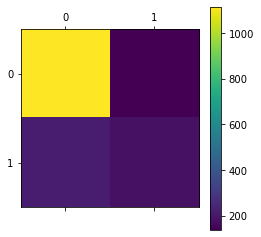

In [136]:
# Confusion Matrix: to evaluate the accuracy of the Decision Tree Classifier 

#predict the target values of the testing data by passing instances_test to the Decision Tree Classifier model
predictions = decTreeModel.predict(instances_test.values)

#confusion_matrix() is used to calculate the confusion matrix to evaluate the accuracy of a classification
print(confusion_matrix(target_test, predictions))

#plot a Confusion Matrix
ConfusionMatrix = confusion_matrix(target_test, predictions)
#pass the ConfusionMatrix to matshow to show an array as a matrix in a new figure window
pl.matshow(ConfusionMatrix)
#add  a colorbar to a plot
pl.colorbar()
#display the Confusion Matrix
pl.show()

In [137]:
#Train
#predict the target values of the training data by passing X_train to the Decision Tree Classifier model
y_train_prediction = decTreeModel.predict(instances_train.values)
#train_per is a one-dimensional (1-D) array that measures the prediction error for the train data, by calling the eval_performance function and passing the y_train, y_train_prediction, and the type of the prediction "Train"
train_per = eval_performance(target_train, y_train_prediction, "Train", 'no')

# Test
#predict the target values of the testing data by passing X_test to the Decision Tree Classifier model
y_test_prediction = decTreeModel.predict(instances_test.values)
#test_per is a one-dimensional (1-D) array that measures the prediction error for the test data, by calling the eval_performance function and passing the y_train, y_train_prediction, and the type of the prediction "Test"
test_per = eval_performance(target_test, y_test_prediction, "Test",'no')

#use concat to combine both results train_per (4 values) and test_per (4 values)
#the 4 values: accuracy, precision, recall, and f1_score
#axis is = 1 because we're joining columns
prediction_performance_table = pd.concat([train_per, test_per], axis = 1)
print(prediction_performance_table)

              Train      Test
accuracy   0.888872  0.785109
precision  0.910751  0.837838
recall     0.948990  0.889243
f1_score   0.929477  0.862775


### Predicting loan eligibility

In [138]:
# Split the data: 80% training : 20% test set

#create a copy of the dataset loan_private_data
train_dfs = loan_private_data.copy()
#remove the target column from the copied dataset
train_dfs = train_dfs.drop(columns=['Loan_Status'])
#store the target column in targetLabels
targetLabels = loan_private_data['Loan_Status']
#split the data into x tarning and testing and y testing and traning, traing set = 80% and testing set = 20% 
instances_train, instances_test, target_train, target_test = train_test_split(train_dfs, targetLabels, test_size=0.2, random_state=0, shuffle=True)


In [139]:
#create a Decision Tree Classifier model with a max_depth (maximum depth of the tree) = 8
decTreeModel = DecisionTreeClassifier(max_depth=8)
#fit the instances_train values and target_train values into the Decision Tree Classifier model using fit()
decTreeModel.fit(instances_train.values, target_train.values)

#Decision Tree Classifier accuracy using traning set
print('Decision Tree Classifier accuracy on training set= {:.2f}'.format(decTreeModel.score(instances_train.values, target_train)))
#Decision Tree Classifier accuracy using testing set
print('Decision Tree Classifier accuracy on testing set= {:.2f}'.format(decTreeModel.score(instances_test.values, target_test)))


Decision Tree Classifier accuracy on training set= 1.00
Decision Tree Classifier accuracy on testing set= 0.75


In [140]:
#get the values of the 1st row (after adding noise)
loan_private_data.iloc[0]

age              45.849524
job               2.669639
marital           1.540089
education         1.087345
balance        4301.030448
loan              2.205537
Loan_Status       1.000000
Name: 0, dtype: float64

In [141]:
#get the values of the 1st row (after adding noise)
loan_private_data.iloc[0].values

array([4.58495244e+01, 2.66963874e+00, 1.54008863e+00, 1.08734463e+00,
       4.30103045e+03, 2.20553747e+00, 1.00000000e+00])

In [142]:
#predict the outsome using the 1st row data
decTreeModel.predict([[4.99671786e+01, 3.22963532e+00, 1.89771482e+00, 1.34309979e+00, 4.29981047e+03, 2.66449688e+00]]) 


array([1])

In [143]:
#get the values of the last row (after adding noise)
loan_private_data.iloc[-1]

age              67.739025
job               3.703332
marital           2.275547
education         1.988495
balance        2150.308685
loan              2.952335
Loan_Status       0.000000
Name: 18, dtype: float64

In [144]:
#get the values of the last row (after adding noise)
loan_private_data.iloc[-1].values 

array([6.77390250e+01, 3.70333249e+00, 2.27554718e+00, 1.98849453e+00,
       2.15030868e+03, 2.95233466e+00, 0.00000000e+00])

In [145]:
#predict the outsome using the last row data
decTreeModel.predict([[6.62659585e+01, 7.92395062e+00, 1.41790519e-02, 2.65598354e+00,2.14972759e+03, 5.49400182e-01]]) 


array([0])

In [146]:
decTreeModel.predict([[57.014327,4.605208,1.007175,1.893252,4054.165584,1.431708]]) 

array([0])

In [147]:
loan_private_data.iloc[1].values 

array([5.65156543e+01, 6.23219521e-01, 1.62829611e+00, 4.39419205e+00,
       4.05365925e+03, 1.70321759e+00, 0.00000000e+00])

[[2 0]
 [1 1]]


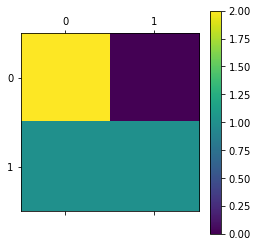

In [148]:
# Confusion Matrix: to evaluate the accuracy of the Decision Tree Classifier 

#predict the target values of the testing data by passing instances_test to the Decision Tree Classifier model
predictions = decTreeModel.predict(instances_test.values)

#confusion_matrix() is used to calculate the confusion matrix to evaluate the accuracy of a classification
print(confusion_matrix(target_test, predictions))

#plot a Confusion Matrix
ConfusionMatrix = confusion_matrix(target_test, predictions)
#pass the ConfusionMatrix to matshow to show an array as a matrix in a new figure window
pl.matshow(ConfusionMatrix)
#add  a colorbar to a plot
pl.colorbar()
#display the Confusion Matrix
pl.show()

In [149]:
#Train
#predict the target values of the training data by passing X_train to the Decision Tree Classifier model
y_train_prediction = decTreeModel.predict(instances_train.values)
#train_per is a one-dimensional (1-D) array that measures the prediction error for the train data, by calling the eval_performance function and passing the y_train, y_train_prediction, and the type of the prediction "Train"
train_per = eval_performance(target_train, y_train_prediction, "Train", 0)

# Test
#predict the target values of the testing data by passing X_test to the Decision Tree Classifier model
y_test_prediction = decTreeModel.predict(instances_test.values)
#test_per is a one-dimensional (1-D) array that measures the prediction error for the test data, by calling the eval_performance function and passing the y_train, y_train_prediction, and the type of the prediction "Test"
test_per = eval_performance(target_test, y_test_prediction, "Test", 0)

#use concat to combine both results train_per (4 values) and test_per (4 values)
#the 4 values: accuracy, precision, recall, and f1_score
#axis is = 1 because we're joining columns
prediction_performance_table = pd.concat([train_per, test_per], axis = 1)
print(prediction_performance_table)

           Train      Test
accuracy     1.0  0.750000
precision    1.0  0.666667
recall       1.0  1.000000
f1_score     1.0  0.800000
